In [1]:
import matplotlib.pylab as plt   # That gives plotting, and the next line makes plots appear inline in notebook
%matplotlib inline  
import numpy as np  # That gives numerical arrays and tools for manipulating them
import scipy.optimize as opt
import scipy.linalg as la
from scipy.stats import expon

In [2]:
rng = np.random.default_rng()

In [3]:
A = np.array([[0.98, 0.1, 0],
             [0.02, 0.7, 0.05],
             [0, 0.2, 0.95]])

In [ ]:
#number of timesteps
Tmax= 1000000

#intialize array of states; need to be integers as will use as indices below
states=np.zeros(Tmax,dtype=int)
#set initial state
states[0]=0 

In [5]:
for t in np.arange(Tmax - 1):
    u = rng.uniform(0,1, 1)
    
    A_1j = A[0, states[t]]
    A_2j = A[1, states[t]]
    
    if u < A_1j: # closed
        states[t+1] = 0
    elif A_1j <= u < (A_1j + A_2j) : # closed
        states[t+1] = 1
    elif (A_1j + A_2j) <= u: # open
        states[t+1] = 2


In [6]:
r_states = []
for s in states:
    if s == 0 or s == 1:
        r_states.append(0)
    else:
        r_states.append(1)

In [7]:
count = 0
d_times = []

for num in r_states:
    if num == 0:
        count += 1  # Increment count when 0 is found
    elif count > 0:
        d_times.append(count)  # Store the count if chunk ends
        count = 0  # Reset count after a chunk ends

# In case the last chunk ends with 0s, append the final count
if count > 0:
    d_times.append(count)

In [8]:
len(d_times)

20075

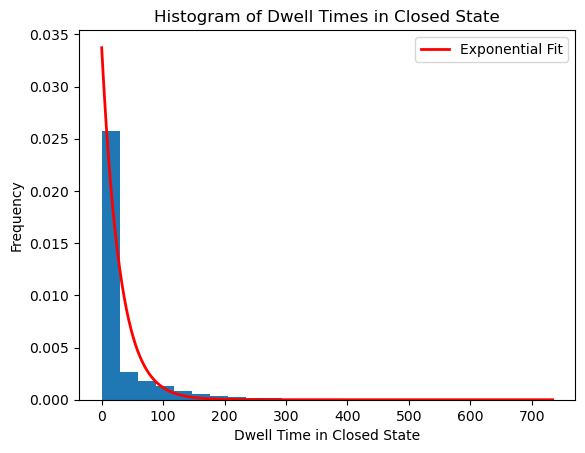

In [14]:
plt.hist(d_times, bins=25, density=True)
plt.xlabel('Dwell Time in Closed State')
plt.ylabel('Frequency')
plt.title('Histogram of Dwell Times in Closed State')

loc, scale = expon.fit(d_times, floc=0)  
x = np.linspace(0, max(d_times), 1000)
pdf_fitted = expon.pdf(x, loc, scale)
plt.plot(x, pdf_fitted, 'r-', lw=2, label='Exponential Fit')
plt.legend()

plt.show()

Text(0, 0.5, 'timestep')

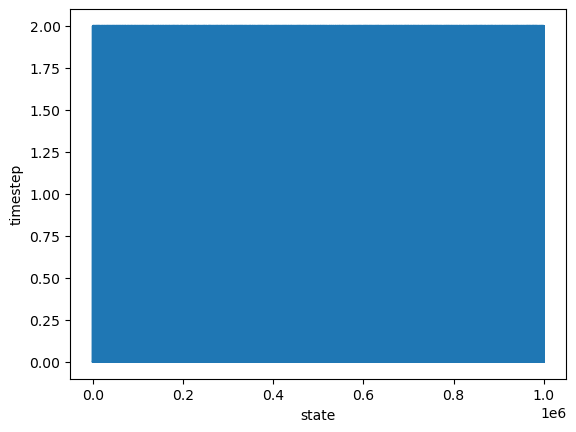

In [16]:
plt.plot(states)
plt.xlabel('state')
plt.ylabel('timestep')
